---
# Project 2 : Ames Housing Data and Kaggle Challenge

---
## Part III. Modelling & Insights
---

Now that the housing data has been cleaned and processed, can create a model to predict sales prices while also being able to infer relationships between the features and sales prices. Will perform scaling and regularization at the end of the notebook, after evaluating coefficients of the multiple linear regression (MLR) model, and determining whether or not the MLR assumptions hold true.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imports specific to Linear Regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [3]:
# Read in the train and test data.
train_df = pd.read_csv('../datasets/train_clean.csv')
test_df = pd.read_csv('../datasets/test_clean.csv')

---
### Multiple Linear Regression
---
To begin, selected most correlated numeric variables with sale price (from heat map) in our training data and the categorical columns that were encoded numerically in the previous notebook.

In [12]:
# Perform train-test split.
# Don't include saleprice or id number in X. 
features = train_df.drop(columns = ['id', 'saleprice']).columns

X = train_df[features]
y = train_df['saleprice']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr_1 = LinearRegression()
lr_1.fit(X_train, y_train)

lr_1.score(X_train, y_train)

0.7928956942461509

### Interpretation of Baseline Score:
79% of variation in sale price can be explained by the features in this multiple linear regression model. This is the R2 score, or the coefficient of determination.

In [14]:
cross_val_score(lr_1, X_train, y_train, cv = 5).mean()

0.7592375862015722

### Interpretation of Cross Validation Score:

Since the cross val score is not as high as the baseline, suggests the model isn't as good as its R2 suggested.

In [10]:
# Save sale price predictions as csv.
test_preds = lr_1.predict(test_df[features])
test_df['saleprice'] = test_preds
test_df[['id','saleprice']].to_csv('../datasets/MLR.csv', index = False)

### Interpretation of Coefficients:

In [32]:
lr_1.coef_

array([ 8.34023394e-01,  3.89765273e+01,  5.12830765e+01,  2.17758039e+04,
        1.22780613e+01, -4.32350415e+02, -2.40586375e+03, -1.80500600e+04,
       -1.56136959e+04, -1.07511007e+04,  1.67611078e+04,  1.25671395e+04,
        2.62629430e+04, -9.01019272e+03, -5.50681044e+02,  1.90428163e+04,
        3.73227541e+03, -9.85651383e+03,  7.65878103e+04, -9.74507436e+03])

In [64]:
# Going to create a table of the coefficients, using code from lecture 3.02.
# Zip coef_ with the features list
list(zip(lr_1.coef_, features))
df_coef = pd.DataFrame(lr_1.coef_, index = features, columns = ['Coefficient']).sort_values(by = ['Coefficient'])

Coefficient interpretation:
|Feature|Coefficient|
|---|---|
|Duplex|-18050.060004|
|Townhouse Inside Unit|-15613.695881|
|Townhouse End Unit|-10751.100709|
|No Remodel|-9856.513834
|No Fireplace|-9745.074356|
|2.5 story:2nd Level Unfinished|-9010.192718|
|2 Family Conversion|-2405.863749|
|2 Story|-550.681044|
|House Age|-432.350415|
|Lot Area|0.834023|
|Total Basement Area|12.278061|
|Garage Area|38.976527|
|Above Ground Living Area|51.283077|
|Split Level|3732.275411|
|1 Story|12567.139463|
|1.5Unf|16761.107787|
|Split Foyer|19042.816344|
|Overall Quality|21775.803903|
|2.5 Stories|26262.943041|
|No Pool|76587.810325|

Looking at our table of coefficients, the three "less desirable" features are all building types. We can infer that duplexes, townhouse inside unit and townhouses end units are correlated with lower market prices. 

The three "most desirable" features are not having a pool, the house being a 2.5 stories and the overall quality being high. To interpret precisely, for overall quality for example, holding all else equal, a 1 unit increase on the quality scale is associated with an increase in sale price of 21,775 dollars, holding all other features equal.

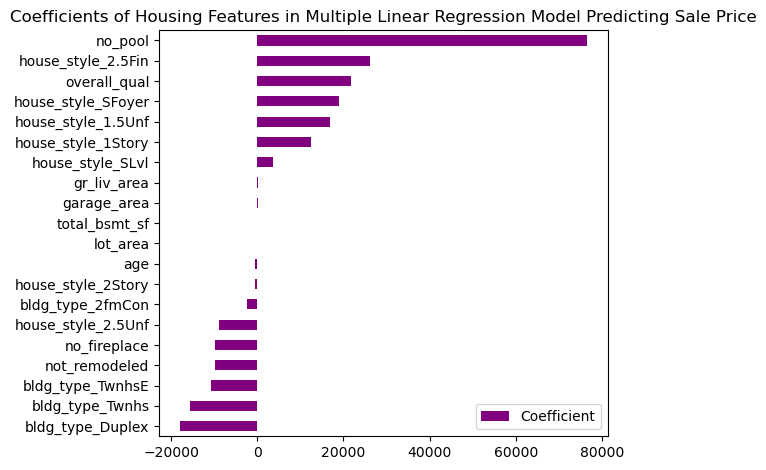

In [70]:
# Show coefficients visually.
pd.DataFrame(lr_1.coef_, index = features, columns = ['Coefficient']).sort_values(by = ['Coefficient']).plot(kind = 'barh', color = 'purple');
plt.title('Coefficients of Housing Features in Multiple Linear Regression Model Predicting Sale Price');

plt.tight_layout()
plt.savefig('../images/coefficients.png');

---
### Ridge 
---

Ridge is a regularisation technique used to help when model is overfit, by imposing a penalty on the coefficients. Since my model doesn't seem to have too high of an R2 or too many features, would suspect it is not overfit but definitely worth checking. 

In [ ]:
# Code for ridge and lasso largely taken and adjusted from lecture 4.03. 

In [18]:
# Import Ridge Regressor:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [16]:
train_df.drop(columns = ['id', 'saleprice']).columns

X = train_df[features]
y = train_df['saleprice']

In [17]:
# Perform train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.7,
    random_state=42
)

In [19]:
# Scale our data. Can help deal with outliers.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [20]:
# First, do linear Regression on scaled train dataa.
ols = LinearRegression()

ols.fit(Z_train, y_train)

LinearRegression()

In [21]:
# Get the training and testing scores to compare.
print(f'Training Score: {ols.score(Z_train, y_train)}')
print(f'Testing Score: {ols.score(Z_test, y_test)}')

Training Score: 0.7646405727141498
Testing Score: 0.791789477659241


The scaled transformed data performs quite similarly using a multiple linear regression model compared to the non-scaled baseline score.

In [24]:
# Perform Ridge fit to see how it affects the scores. Select a random alpha to begin.
ridge = Ridge(alpha = 100)

# Fit.
ridge.fit(Z_train, y_train)

# Evaluate model using R2.
print(f'Training Score: {ridge.score(Z_train, y_train)}')
print(f'Testing Score: {ridge.score(Z_test, y_test)}')

Training Score: 0.7579260379702784
Testing Score: 0.791487630457381


In [25]:
# To find the best alpha value, have to cross validate which, as learned in lecture, 
# we use np.logspace generates 100 values equally between 0 and 5, then convert them to alphas 
# between 10^0 and 10^5.

alphas = np.logspace(0,5, 100)

# RidgeCV will cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = alphas, cv = 5)

# RidgeCV will fit the model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5)

In [26]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.7563212999908334
0.7906976531956161


Model is performing better in terms of R2 on the testing set, whereas can see that the R2 score of the training set has decreased, suggesting the model was potentially overfit.

In [28]:
ridge_preds = ridge.predict(test_df[features])

/Users/makenamaryannejones/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [29]:
test_df['saleprice'] = ridge_preds

In [30]:
test_df[['id','saleprice']].to_csv('../datasets/ridge_model.csv', index = False)

---
### Lasso Model
---

In [51]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV

In [52]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas)
# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [53]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [54]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.7646405654147366
0.7918074895025379


In [55]:
lasso_coefs = lasso_cv.coef_

In [56]:
pd.Series(lasso_coefs)

0     -2510.710464
1     11747.063967
2     25961.467100
3     30952.436939
4       592.747392
5    -15585.887355
6      -584.664996
7     -2116.583488
8     -3331.119258
9     -5738.592759
10     1142.124386
11     8887.946240
12      830.525531
13     -244.280911
14     1582.673711
15     2847.521653
16      891.259397
17    -6186.092080
18     8609.224498
19    -8340.504134
dtype: float64

In [60]:
pd.Series(lasso_coefs, X.columns).sort_values(ascending = False)

overall_qual          30952.436939
gr_liv_area           25961.467100
garage_area           11747.063967
house_style_1Story     8887.946240
no_pool                8609.224498
house_style_SFoyer     2847.521653
house_style_2Story     1582.673711
house_style_1.5Unf     1142.124386
house_style_SLvl        891.259397
house_style_2.5Fin      830.525531
total_bsmt_sf           592.747392
house_style_2.5Unf     -244.280911
bldg_type_2fmCon       -584.664996
bldg_type_Duplex      -2116.583488
lot_area              -2510.710464
bldg_type_Twnhs       -3331.119258
bldg_type_TwnhsE      -5738.592759
not_remodeled         -6186.092080
no_fireplace          -8340.504134
age                  -15585.887355
dtype: float64

# Interpreting the Lasso coefficients:
Looking at the coefficients, all features in model seem to have a strong affect on our target variable, house sale price.

In [59]:
# Save lasso predictions.
lasso_preds = lasso_cv.predict(test_df[features])
test_df['saleprice'] = lasso_preds
test_df[['id','saleprice']].to_csv('../datasets/lasso_model.csv', index = False)

/Users/makenamaryannejones/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


---
## Conclusion
---

To answer my problem statement, certain features are undoubtably associated with higher prices, but they seem to be structural and hard to necessarily change for a homeowner or realtor looking to increase the market price of a home.

Type of home and style of home are associated with higher prices, just as older homes are associated with lower prices.

To isolate what features are possible to ameliorate or add without the cost surpassing the increasae in the sale price of the house, further analysis would have to be done.